In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle

# Problem setup

In [2]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 1.0, 1.1, samples=5)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

# COLLISION SCENE
sc1 = [Rectangle(3.7, 1.3, 2, 1, -0.1)]
sc2 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

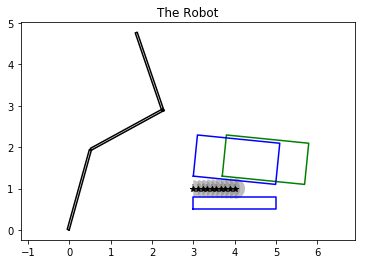

In [3]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
for r in sc2: r.plot(ax1, 'b')
plt.show()

# Solve problem
## Sampling based

In [4]:
from ppr.sampling import cart_to_joint
#from ppr.sampling import get_shortest_path
from ppr.graph_pure_python import get_shortest_path

In [5]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

In [6]:
sol = get_shortest_path(path_js)
print(sol['success'])

True


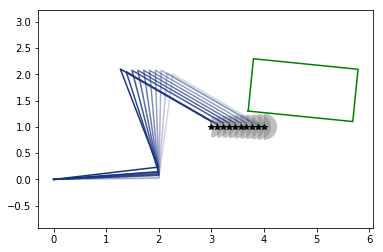

In [7]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path_kinematics(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

In [8]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc2)

In [9]:
sol2 = get_shortest_path(path_js)
print(sol2['success'])

True


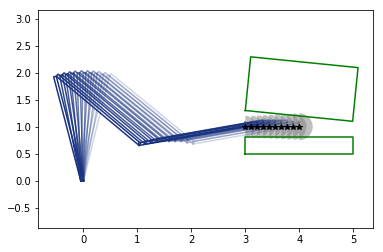

In [10]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path(ax2, sol2['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

## Optimisation based

In [11]:
from ppr.optim import get_optimal_trajectory

In [12]:
#q_init = sol['path']
#q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, check_collision=True, scene=sc1)
q_init = sol2['path']
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, check_collision=True, scene=sc2)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.8846027169565687
            Iterations: 70
            Function evaluations: 2318
            Gradient evaluations: 66


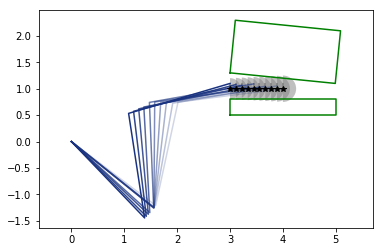

In [13]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_opt)
#for r in sc1: r.plot(ax3, 'g')
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

In [14]:
weights = w={'joint_motion': 0.0, 'path_error': 0.0, 'torque': 1.0}
robot1.set_link_inertia([1, 1, 1], [0.5, 0.5, 0.25], [0.05, 0.05, 0.05])
q_opt2, _1, _2 = get_optimal_trajectory(robot1, path1, q_init,
                                                 check_collision=True, scene=sc1,
                                                 w=weights)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.00794380877458175
            Iterations: 57
            Function evaluations: 1901
            Gradient evaluations: 57


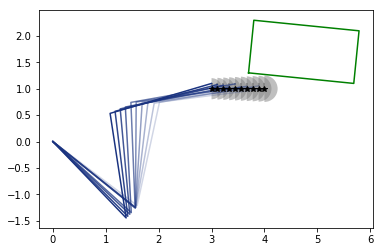

In [15]:
fig4, ax4 = plt.subplots()
ax4.axis('equal')
robot1.plot_path_kinematics(ax4, q_opt)
for r in sc1: r.plot(ax4, 'g')
for tp in path1: tp.plot(ax4)
plt.show()